**Kernel Regression**

In [17]:
import torch
import matplotlib.pyplot as plt

In [18]:
kernel = lambda w: torch.exp(-(w**2)/2)

def F(x, y):
  n = len(x)
  x = x.unsqueeze(1)
  y = y.unsqueeze(1)
  x = x.expand(n, n)
  _x = x.T
  Xm = x - _x

  sample_std = torch.std(x)
  sample_IQR = torch.quantile(x, 0.75) - torch.quantile(x, 0.25)
  sigma = min(sample_std, sample_IQR/1.34)
  h = 1.06 * sigma / torch.pow(torch.tensor(float(n)), torch.tensor(1/5)) # bandwidth
  _h = 1/h

  Xm = _h * Xm
  Xmk = kernel(Xm)
  Xmks = torch.einsum('ng->n', Xmk) # sum of g dim
  Xmksi = torch.pow(Xmks, torch.tensor(-1))
  Xmky = torch.einsum('ng, gj -> nj', Xmk, y) # product
  Xmky = Xmky.squeeze(1)
  m = torch.einsum('n, n -> n', Xmksi, Xmky) # Element-wise product of corresponding rows

  return m

y = sin(x)

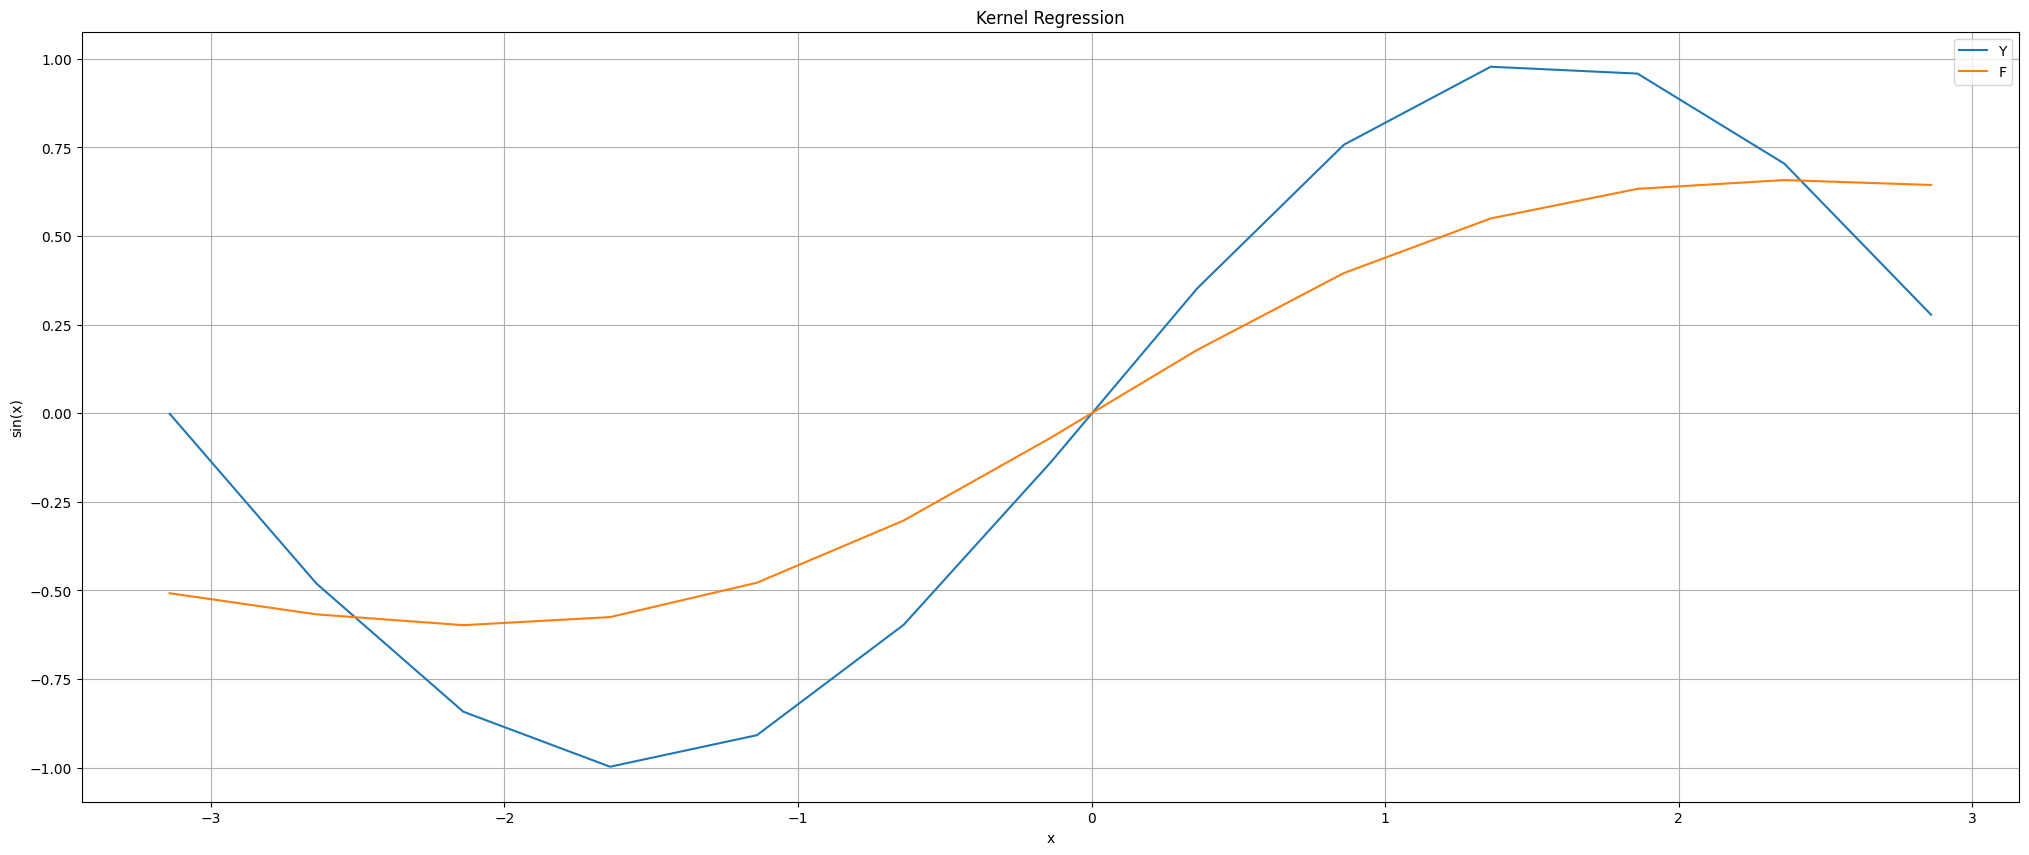

In [19]:
x = torch.arange(-3.14, 3.14, 0.5, dtype=torch.float)
y = torch.sin(x)
f = F(x, y)

plt.figure(figsize=(25, 10))
plt.plot(x.numpy(), y.numpy(), label='Y')
plt.plot(x.numpy(), f.numpy(), label='F')
plt.title('Kernel Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()

y = -x + 5

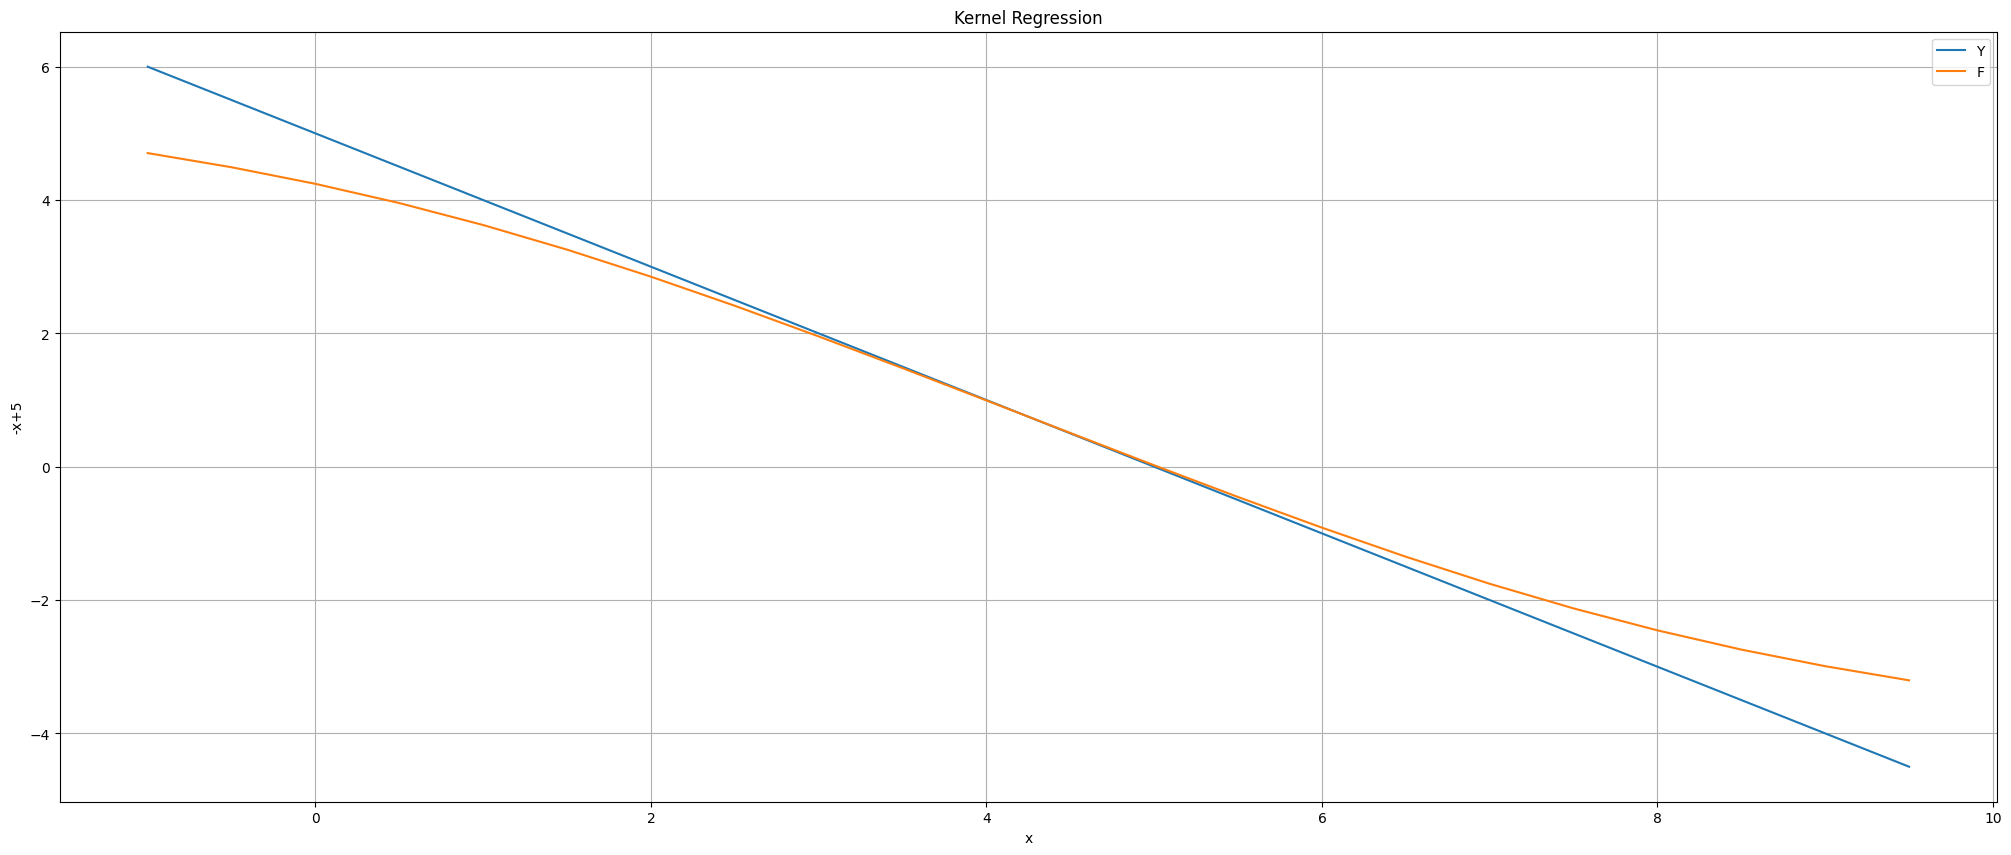

In [20]:
x = torch.arange(-1, 10, 0.5)
y =-x+5
f = F(x, y)

plt.figure(figsize=(25, 10))
plt.plot(x.numpy(), y.numpy(), label='Y')
plt.plot(x.numpy(), f.numpy(), label='F')
plt.title('Kernel Regression')
plt.xlabel('x')
plt.ylabel('-x+5')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
n = len(x)

kernel = lambda w: torch.exp(-(w**2)/2)

sample_std = torch.std(x)
sample_IQR = torch.quantile(x, 0.75) - torch.quantile(x, 0.25)
sigma = min(sample_std, sample_IQR/1.34)
h = 1.06 * sigma / torch.pow(torch.tensor(float(n)), torch.tensor(1/5)) # bandwidth

T = []
u = []
sum = []
for m in x:
  t = torch.arange(-6, 15, 0.5)
  T.append(t)
  u.append(kernel((t-m)/h))
  sum.append(torch.sum(kernel((x-m)/h)))

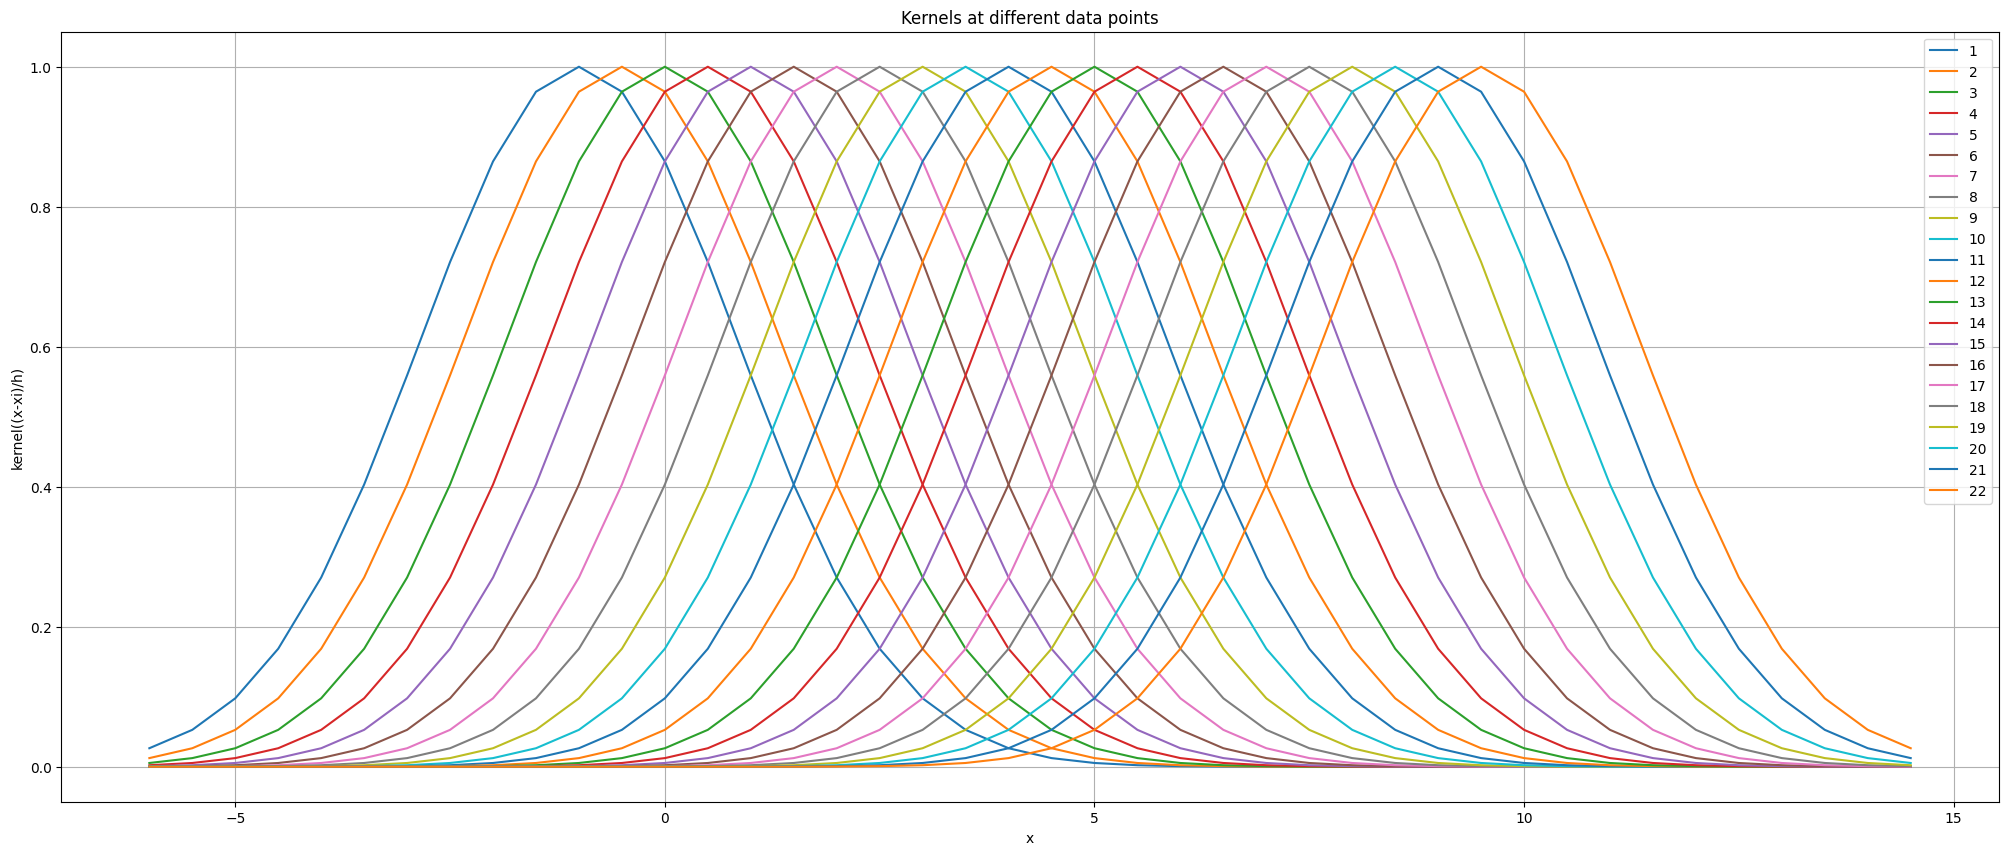

In [22]:
plt.figure(figsize=(25, 10))

i=0
for t in T:
  plt.plot(T[i].numpy(), u[i].numpy(), label=i+1)
  i+=1

plt.title('Kernels at different data points')
plt.xlabel('x')
plt.ylabel('kernel((x-xi)/h)')
plt.legend()
plt.grid(True)
plt.show()

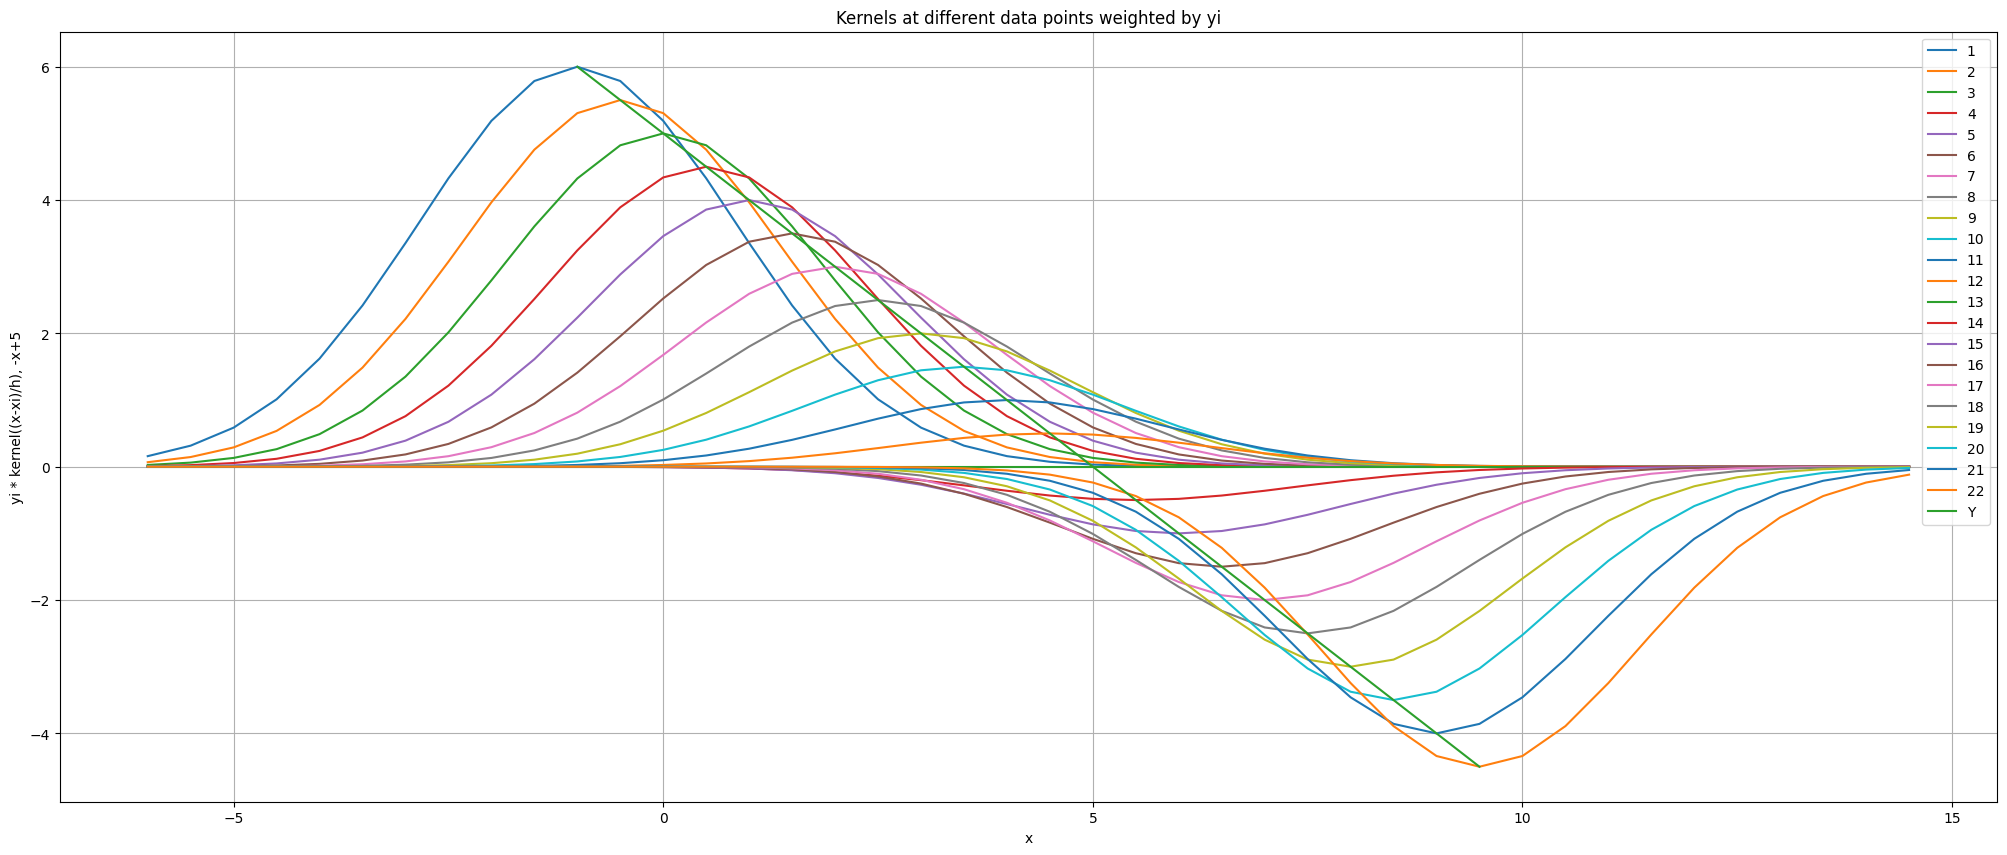

In [23]:
plt.figure(figsize=(25, 10))

i=0
for t in T:
  plt.plot(T[i].numpy(), y[i].numpy()*u[i].numpy(), label=i+1)
  i+=1

plt.plot(x.numpy(), y.numpy(), label='Y')
plt.title('Kernels at different data points weighted by yi')
plt.xlabel('x')
plt.ylabel('yi * kernel((x-xi)/h), -x+5')
plt.legend()
plt.grid(True)
plt.show()

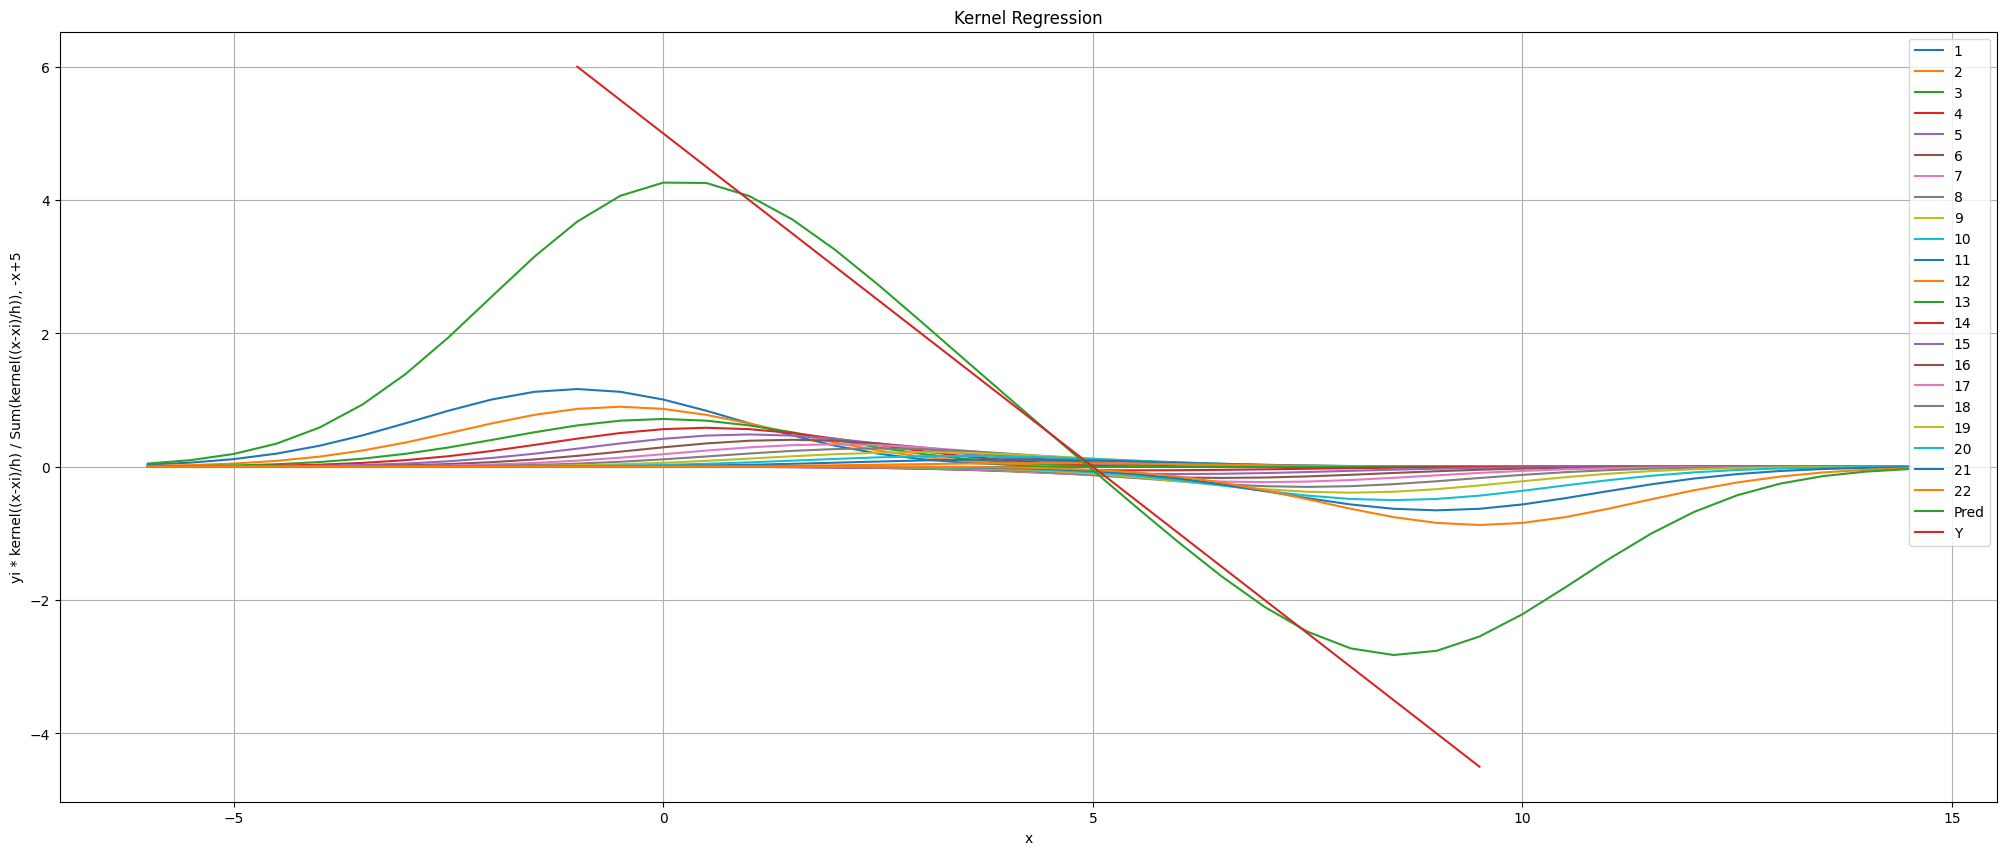

In [24]:
plt.figure(figsize=(25, 10))

pred = torch.zeros(u[0].shape)

i=0
for t in T:
  plt.plot(T[i].numpy(), y[i].numpy()*u[i].numpy() * 1/sum[i], label=i+1)
  pred = pred + y[i]*u[i] * 1/sum[i]
  i+=1

plt.plot(T[0].numpy(), pred.numpy(), label='Pred')
plt.plot(x.numpy(), y.numpy(), label='Y')
plt.title('Kernel Regression')
plt.xlabel('x')
plt.ylabel('yi * kernel((x-xi)/h) / Sum(kernel((x-xi)/h)), -x+5')
plt.legend()
plt.grid(True)
plt.show()